![image.png](plots/portada5.png)

¡Bienvenidos a la cuarta sesión del curso de introducción a Python! Aquí veremos:

* Cómo trabajar con Pandas
* Cómo se integran pandas y matplotlib
* Cómo hacer analisis exploratorios en los datos

Al igual que en la primera parte, la documentación asociada a estas sesiones son dos libros, ambos disponibles de forma gratuita [aquí](https://jakevdp.github.io/pages/about.html):

* A Whirlwind Tour of Python by Jake VanderPlas (O’Reilly). Copyright 2016 O’Reilly Media, Inc., 978-1-491-96465-1
* The Python Data Science Handbook by Jake VanderPlas (O’Reilly). Copyright 2016 Jake VanderPlas, 978-1-491-91205-8.


# `Pandas`
___

![image.png](plots/pandas_meme2.png)

Si `NumPy` era el paquete para el cálculo numérico y matricial, `pandas` trae a Python toda una estructura de dataframes, pero con algunas diferencias con respecto a programas como `R`. Los objetos básicos de `pandas` son las `Series` y los `DataFrames`. Empecemos por las `Series`.

## `pd.Series`

Una serie es un array unidimensional con un índice asociado

In [1]:
import numpy as np
import pandas as pd

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


Las series tienen dos atributos, `data.values` devuelve el array de datos, y `data.index` devuelve el índice. Si no le indicamos ningún índice, se genera uno automáticamente, pero podemos darle cualquier valor que se nos ocurra:

In [2]:
data = pd.Series(data = [0.25, 0.5, 0.75, 1.0], index=['Madrid', 'Valencia', 'Barcelona', 'Sevilla'])
print(data)

print(f'\ndata.values: \n{data.values}\n\ndata.index: \n{data.index}' )

Madrid       0.25
Valencia     0.50
Barcelona    0.75
Sevilla      1.00
dtype: float64

data.values: 
[0.25 0.5  0.75 1.  ]

data.index: 
Index(['Madrid', 'Valencia', 'Barcelona', 'Sevilla'], dtype='object')


También podemos crear una lista desde un diccionario de Python:

In [3]:
d = dict(Madrid=0.25, Valencia=0.5, Barcelona=0.75, Sevilla=1)
data = pd.Series(d)
data

Madrid       0.25
Valencia     0.50
Barcelona    0.75
Sevilla      1.00
dtype: float64

__En pandas existe por tanto un índice implícito (números de 0 en adelante) y un índice explícito (el valor que le demos al índice)__ y se puede usar cualquiera de los dos para acceder a los elementos de una serie:

In [4]:
print(data[0:2], '\n')  # Índice implícito

print(data['Madrid':'Barcelona'])  # Índice explicito

Madrid      0.25
Valencia    0.50
dtype: float64 

Madrid       0.25
Valencia     0.50
Barcelona    0.75
dtype: float64


### <font color='D12828'> Ejercicio: </font>

* ¿Ves algo raro en la cantidad de elementos que hemos seleccionado usando el índice implícito vs el explícito?

* Crea una serie que almacene los valores del coseno de x entre -4 y 4 y representala gráficamente.

In [5]:
# Ejercicio


## `pd.DataFrame`
Un DataFrame es un conjunto de series que tiene dos índices, uno asociado a las filas y otro asociado a las columnas.

In [6]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

print(population)

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


In [7]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

print(area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


## Índices y columnas: doble índice

In [8]:
states = pd.DataFrame({'population': population,
                       'area': area})

print(f'Dimensión del dataset: {states.values.shape} \n')

states

Dimensión del dataset: (5, 2) 



,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [9]:
print(f'\ndata.values: \n{states.values}\n\ndata.index: \n{states.index}\n\ndata.columns: \n{states.columns}' )


data.values: 
[[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]]

data.index: 
Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

data.columns: 
Index(['population', 'area'], dtype='object')


Esta estructura de doble índice (explícito) de pandas es diferente de la que encontramos en otros programas como R, que tienen un índice explícito para las columnas (que entiende como variables) pero no para las filas (que entiende como observaciones). Esto hace que __si en Python trasponemos un dataframe, lo único que ocurra es que se intercambien los lugares de los índices de filas y columnas:__

In [10]:
states.T  # .T permite trasponer matrices y dataframes

,California,Texas,New York,Florida,Illinois
population,38332521,26448193,19651127,19552860,12882135
area,423967,695662,141297,170312,149995


## Crear variables en un dataframe
Crear una nueva variable en un dataframe es tan sencillo como darle nombre a una nueva columna y poner la información que contiene esa columna. Por ejemplo:

In [11]:
states['region'] = ['west', 'center', 'east', 'east', 'center']
states

,population,area,region
California,38332521,423967,west
Texas,26448193,695662,center
New York,19651127,141297,east
Florida,19552860,170312,east
Illinois,12882135,149995,center


## Slicing e indexing


Mientras que en las series, escribiendo `serie[idx]` podíamos acceder a un elemento de la serie, los DataFrame, al tener doble índice, son más especialitos. __Si hacemos indexing, podemos acceder a las columnas, pero si hacemos slicing, a las filas__. Veamos un ejemplo:

In [12]:
states['density'] = states['population'] / states['area']

states['California':'New York']  # Esto es slicing

,population,area,region,density
California,38332521,423967,west,90.413926
Texas,26448193,695662,center,38.018740
New York,19651127,141297,east,139.076746


In [13]:
states[['population', 'area']]  # Esto es indexing

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Si intentamos hacer slicing en las columnas, obtendremos un mensaje de error

In [14]:
# Devuelve mensaje de error si se ejecuta.
# states['population':'area']

## Formas de generar un dataframe

Antes hemos visto coómo podemos generar un dataframe como un diccionario con listas. Otra alternativa es pasarle como parámetros una matriz de datos, un índice para las filas, y un índice para las columnas. Si no le indicamos el valor de alguno de los índices, automáticamente genera uno numérico

Hay muchas formas de generar un dataframe. Acabamos de ver cómo hacerlo juntando series, pero también podemos usar directamente una matriz de datos de numpy:

In [15]:
df = pd.DataFrame(data=np.random.rand(20).reshape((10,2)), columns = ['columna1', 'columna2'])
df.head()

,columna1,columna2
0,0.470412,0.824427
1,0.675945,0.805724
2,0.640891,0.085263
3,0.573402,0.905363
4,0.339800,0.678167


## Nuestros amigos `loc` e `iloc`

Como hemos visto, pandas puede ser un poco... ambiguo para acceder a filas o columnas. Para solucionar esto existen estos 2 methods:

* `loc` permite acceder usando notación de numpy (filas en la primera posición, y columnas en la segunda), __usando el índice explícito__
* `iloc` permite acceder usando notación de numpy (filas en la primera posición, y columnas en la segunda), __usando el índice implícito__

In [16]:
# Índice explícito
print(states.loc[['California', 'Florida']], '\n\n')

print(states.loc[['California', 'Florida'], 'population'], '\n\n')

print(states.loc['California', ['population', 'density']], '\n\n')

            population    area region     density
California    38332521  423967   west   90.413926
Florida       19552860  170312   east  114.806121 


California    38332521
Florida       19552860
Name: population, dtype: int64 


population    38332521
density        90.4139
Name: California, dtype: object 




__Fíjate que siempre que tengamos un array de una dimensión, ya sea en las filas o las columnas, pandas lo convierte a una serie automáticamente.__ En este caso, los dos últimos son una serie llamada 'population' con dos observaciones, y otra serie llamada 'California' con dos observaciones.

In [17]:
# Índice implícito
print(states.iloc[[0, 2]], '\n\n')

print(states.iloc[[0, 2], 1], '\n\n')

print(states.iloc[0, [0, 2]], '\n\n')

            population    area region     density
California    38332521  423967   west   90.413926
New York      19651127  141297   east  139.076746 


California    423967
New York      141297
Name: area, dtype: int64 


population    38332521
region            west
Name: California, dtype: object 




## Y las masks

Y como con numpy, también podemos usar masks para filtrar más rápido:

In [18]:
states['density'] > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [19]:
states.loc[states['density'] > 100, :]

,population,area,region,density
New York,19651127,141297,east,139.076746
Florida,19552860,170312,east,114.806121


### <font color='D12828'> Ejercicio: </font>

* Convierte el conjunto de datos de iris en un dataset de pandas.

* Usa `loc` e `iloc` para extraer las filas de 0 a 7 y las columnas `sepal length (cm)`, `sepal width (cm)`. ¿Ves alguna diferencia en el número de filas extraidas con cada método?, ¿cual es el motivo?

* Extrae todas las filas y todas las columnas en las que la columna `sepal length (cm)` sea mayor que 5

* Calcula una nueva variable `cociente` = `petal length (cm)` / `petal width (cm)`

In [20]:
# Ejercicio


## Operaciones entre `DataFrames`

Cuando se hacen operaciones que involucran más de un dataframe, __pandas se encarga automáticamente de alinear los índices__ antes de hacer la operación. Veamos un ejemplo:

In [21]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
                 columns=['A','B'])
A

,A,B
0,5,8
1,18,0


In [22]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                 columns=['B','A', 'C'])
B

,B,A,C
0,0,9,3
1,7,2,2
2,0,3,2


In [23]:
A + B

,A,B,C
0,14.0,8.0,NaN
1,20.0,7.0,NaN
2,NaN,NaN,NaN


Vemos que en los casos en los que los índices de `A` y `B`coniciden, los elementos se han sumado, pero si el elemento no estaba presente en alguno de los dos, `Pandas` devuelve `NaN` (not a number). Y esto nos enlaza perfecto con lo siguiente que veremos:

### <font color='D12828'> Ejercicio: </font>
* Convierte las siguientes series en un dataframe
* Crea una nueva columna que sea `densidad` = `population`/`area` y observa el resultado

In [24]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

print(area, '\n\n')
print(population, '\n\n')

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64 


California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64 




In [25]:
# Ejercicio


## ¿Qué hacer cuando hay NaN en los datos?
Pandas incluye algunas funciones para tratar con los datos ausentes: `isnull()`, `notnull()`, `dropna()` y `fillna()`

In [26]:
df_na = pd.DataFrame({'A':[-2, 1, np.nan, 5], 'B':[np.nan, 4, np.nan, 1], 'C':[2, 4, 5, 9]})
df_na

,A,B,C
0,-2.0,NaN,2
1,1.0,4.0,4
2,NaN,NaN,5
3,5.0,1.0,9


`isnull()` comprueba qué datos están ausentes y devuelve un booleano. Sobre ese booleano podemos operar (por ejemplo sumándolo) para obtener el número de datos faltantes en cada columna o en total:

In [27]:
df_na.isnull()  # Comprueba si hay datos faltantes

,A,B,C
0,False,True,False
1,False,False,False
2,True,True,False
3,False,False,False


Para obtener el resultado de cada columna podemos añadir la función `.sum()` al final

In [28]:
df_na.isnull().sum()  # Comprueba si hay datos faltantes

A    1
B    2
C    0
dtype: int64

`dropna()` elimina los datos faltantes. Por defecto, elimina las filas (las observaciones) en las que detecte datos ausentes.

In [29]:
df_na.dropna()  # Elimina filas con datos faltantes

,A,B,C
1,1.0,4.0,4
3,5.0,1.0,9


Si lo que nos interesa es eliminar _las columnas_ podemos usar el parámetro `axis`:

In [30]:
df_na.dropna(axis=1)  # Elimina columnas con datos faltantes

,C
0,2
1,4
2,5
3,9


Otros parámetros que pueden sernos útiles son `how`, que por defecto toma el valor 'any', indicando que si detecta cualquier dato ausente, eliminará esa fila o columna. Pero otra opción es 'all', con lo que eliminaríamos solo las filas(o columnas) en las que todos los datos estén ausentes.

In [31]:
df_na.dropna(axis=1, how='all')  # Elimina filas con datos faltantes

,A,B,C
0,-2.0,NaN,2
1,1.0,4.0,4
2,NaN,NaN,5
3,5.0,1.0,9


Por último, también puede sernos útil el parámetro `thresh`, al cual podemos pasarle el límite de observaciones que no estén ausentes con las que nos queramos quedar. Si por ejemplo especificamos `thresh=2`, eliminaremos todas las filas (o columnas) en las que el número de observaciones distintas de `NaN`sean menores que 2.

In [32]:
df_na.dropna(thresh=2)

,A,B,C
0,-2.0,NaN,2
1,1.0,4.0,4
3,5.0,1.0,9


`fillna()` es el más interesante de estos métodos ya que nos permite rellenar los datos ausentes del dataframe siguiendo varias estrategias:

In [33]:
df_na.fillna(0)  # Rellenar con 0

df_na.fillna(method='bfill')  # Rellenar con el valor anterior

df_na.fillna(df_na.mean())  # Rellenar con la media de cada columna

,A,B,C
0,-2.000000,2.5,2
1,1.000000,4.0,4
2,1.333333,2.5,5
3,5.000000,1.0,9


Igual que usamos la media, podemos usar cualquier otro criterio para rellenar las columnas. En general, pandas acepta cualquier serie cuyo índice sean las columnas de `df`.

### <font color='D12828'> Ejercicio: </font>

1. Comprueba cuantos datos ausentes hay en `df_na`
2. Rellena los datos ausentes de `df_na` con la mediana de cada columna

In [34]:
# Ejercicio


## Pandas y matplotlib

Empecemos descargando unos datos disponibles en el paquete `seaborn`

In [35]:
import seaborn as sns
planets = sns.load_dataset('planets')
print(f'Dimensiones del conjunto de datos: {planets.shape} \n')
planets.head()

Dimensiones del conjunto de datos: (1035, 6) 



,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Este conjunto de datos recoge información sobre exoplanetas descubiertos fuera del sistema solar desde los años 80 hasta 2014. Podemos obtener una descripción básica del conjunto de datos usando el method `.describe()`. En realidad, en un dataframe de pandas podemos usar sin problema los methods de pandas pero también todas las funciones y methods que hemos visto en NumPy. Podríamos calcular la media usando el method `.mean()` pero también la función `np.mean()`.

In [36]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


### <font color='D12828'> Ejercicio: </font>

1. ¿Hay datos ausentes en el conjunto planets?
2. En caso de haberlos, rellenalos con la mediana de cada variable.

In [37]:
# EJercicio


Una de las cosas buenas de matplotlib es que está integrado en pandas. Veamos algunas de las variables del dataset:

<AxesSubplot:>

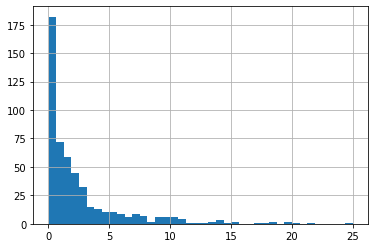

In [38]:
planets['mass'].hist(bins=40)

<AxesSubplot:>

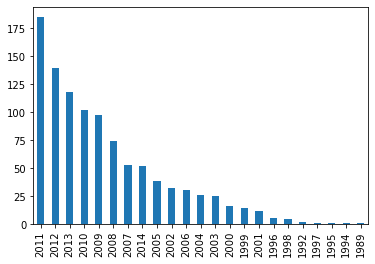

In [39]:
planets['year'].value_counts().plot.bar()

### <font color='D12828'> Ejercicio: </font>
¿Están la masa de los planetas (`mass`) y su periodo orbital (`orbital_period`) relacionados? Pista: ambas variables son numéricas, piensa como representarlas a la vez.

In [40]:
# Ejercicio


## Plotnine
Todos sabemos que las comparaciones son odiosas y que para gustos colores, pero para los que conozcais el paquete `ggplot`, en `R` vereis que matplotlib puede ser un poco engorroso...

![image.png](plots/meme_matplotlib_ggplot2.png)

Pero tengo buenas noticias: el paquete de Python `plotnine` (que instalamos al inicio de esta sesión) es básicamente el `ggplot` de R, con lo que podemos hacer gráficas como:

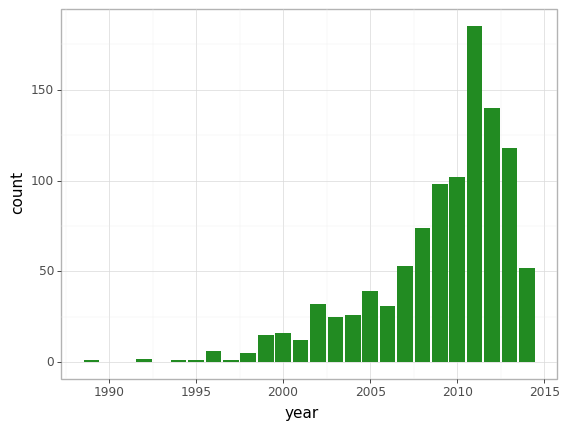

<ggplot: (130031353625)>

In [41]:
from plotnine import *
(ggplot(planets, aes(x='year')) + geom_bar( fill='forestgreen') + theme_light())

Así que si sabéis usar `ggplot`, podeis usarlo para hacer gráficas en Python.

## `groupby` y otras cosas útiles
Pandas incluye la función `groupby`, que como su nombre indica, permite agrupar los dataframes de acuerdo a algún criterio que nosotros pongamos (una variable del dataframe). Una vez agrupados los datos, podemos filtrarlos, agregar información etc. 

In [42]:
planets.groupby('method')

![image.png](plots/split_apply_combine.png)

Internamente, `planets.groupby('method')` es un diccionario que tiene como clave, el valor de un `method`, y como valor, el conjunto de planetas que fueron descubiertos con ese method.

In [43]:
for method, group in planets.groupby('method'):
    print(f'method: {method}. Tamaño: {group.shape}')

method: Astrometry. Tamaño: (2, 6)
method: Eclipse Timing Variations. Tamaño: (9, 6)
method: Imaging. Tamaño: (38, 6)
method: Microlensing. Tamaño: (23, 6)
method: Orbital Brightness Modulation. Tamaño: (3, 6)
method: Pulsar Timing. Tamaño: (5, 6)
method: Pulsation Timing Variations. Tamaño: (1, 6)
method: Radial Velocity. Tamaño: (553, 6)
method: Transit. Tamaño: (397, 6)
method: Transit Timing Variations. Tamaño: (4, 6)


### `.agg`
¿Cuando fue la primera vez que cada método de detección de planetas fue utilizado? Para responder esto, necesitamos agrupar el dataframe en base al método de detección de planetas, y después buscar el mínimo del año en cada grupo. Si usamos `groupby` lo que obtenemos es un objeto `PandasDataFrameGroupBy` pero no obtendremos nuestra respuesta hasta que no usemos ninguna función para agregar los datos, en este caso el mínimo.

In [44]:
planets.groupby('method')['year'].min()

method
Astrometry                       2010
Eclipse Timing Variations        2008
Imaging                          2004
Microlensing                     2004
Orbital Brightness Modulation    2011
Pulsar Timing                    1992
Pulsation Timing Variations      2007
Radial Velocity                  1989
Transit                          2002
Transit Timing Variations        2011
Name: year, dtype: int64

Vemos por ejemplo que la tecnología má antigua fue _Pulsar timing_ y las más modernas, _Transit timing variations_ y _Orbital Brightness Modulation_.

### <font color='D12828'> Ejercicio: </font>

1. ¿Cual es la media del periodo orbital (`orbital_period`) en función de cada método usado para descubir los planetas?
1. ¿Cual es la mediana de la distancia (`distance`) en función de cada método usado para descubir los planetas?

In [45]:
# Ejercicio


También tenemos la forma general de `agg`, quie permite usar varias funciones a la vez:

In [46]:
planets.groupby('method')['year'].agg([min, max, np.median, 'sum'])

,min,max,median,sum
method,,,,
Astrometry,2010,2013,2011.5,4023
Eclipse Timing Variations,2008,2012,2010.0,18090
Imaging,2004,2013,2009.0,76347
Microlensing,2004,2013,2010.0,46225
Orbital Brightness Modulation,2011,2013,2011.0,6035
Pulsar Timing,1992,2011,1994.0,9992
Pulsation Timing Variations,2007,2007,2007.0,2007
Radial Velocity,1989,2014,2009.0,1110158
Transit,2002,2014,2012.0,798461


### `.filter`

Los methods de filter permiten filtrar los subgrupos de acuerdo al criterio que nosotros queramos. Por ejemplo, si queremos quedarnos con los métodos de búsqueda de planetas que hayan detectado al menos 100 planetas, podríamos hacerlo con un filter:

In [47]:
def filtro_al_menos_100(sub_df):
    return sub_df.shape[0] > 100

planets.groupby('method').filter(filtro_al_menos_100)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [48]:
# Lo mismo pero con una lambda function

planets.groupby('method').filter(lambda x: x.shape[0] > 100)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


Aquí hemos empezado por agrupar por 'method', después hemos aplicado un filter. Ese filter lo hemos definido con una función lambda (vistas en la primera parte del curso). Cada `x` en esa función lambda es uno de los subgrupos (métodos para detectar planetas). Así que contamos el número de filas en cada subgrupo y nos quedamos con los que tengan más de 100.

### <font color='D12828'> Ejercicio: </font>

Filtra los métodos de detección de planetas (`method`) y quédate con aquellos en los que la media del `orbital_period` sea mayor de 150 días

In [49]:
# Ejercicio


### `.transform`

Por último, `.transform` es un method que aplica una transformación al dataframe, pero en vez de hacerlo a nivel de todo el dataframe, lo hace a nivel de los subgrupos. El ejemplo clásico es: quiero centrar los datos pero no globalmente sino por grupos. Esto nos permite por ejemplo, centrar los datos restando su media, pero no la media global sino la de cada grupo.

In [50]:
planets.groupby('method').transform(lambda x: x - x.mean() ).head()

,number,orbital_period,mass,distance,year
0,-0.721519,-554.05468,4.469301,25.799792,-1.518987
1,-0.721519,51.41932,-0.420699,5.349792,0.481013
2,-0.721519,-60.35468,-0.030699,-31.760208,3.481013
3,-0.721519,-497.32468,16.769301,59.019792,-0.518987
4,-0.721519,-307.13468,7.869301,67.869792,1.481013


### <font color='D12828'> Ejercicio: </font>

Transforma los datos para que estén estandarizados (media 0 y desviación típica 1) por grupos en base al método de detección.

In [51]:
# Ejercicio


## Cargar datos en pandas

`pandas` incropora funciones para cargar muchos tipos de archivos. Todas las funciones empiezan por `pd.read_tipodearchivo`. Por ejemplo, para cargar un archivo csv, usaríamos `pd.read_csv`. Usemos esta función para cargar un dataset con información de coches de una subasta en EEUU.

In [52]:
cars = pd.read_csv('data/CARS.csv')
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


### <font color='D12828'> Ejercicio: </font>

1. ¿Hay datos ausentes en este conjunto?

2. Obtén una tabla resumen de los datos

3. Obtén una representación del peso de los coches

4. ¿Están relacionados los caballos de estos coches con su peso?

In [53]:
# Ejercicio


## `cross_tab`

Una cross table permite comparar variables categóricas de forma sencilla,veamos un ejemplo:

In [54]:
tabla = pd.crosstab(cars['Type'], cars['Origin'])
tabla 

Origin,Asia,Europe,USA
Type,,,
Hybrid,3,0,0
SUV,25,10,25
Sedan,94,78,90
Sports,17,23,9
Truck,8,0,16
Wagon,11,12,7


Con estas tablas, podemos hacer gráficos de barras en los que se resuma la información de las dos variables categóricas:

<AxesSubplot:xlabel='Type'>

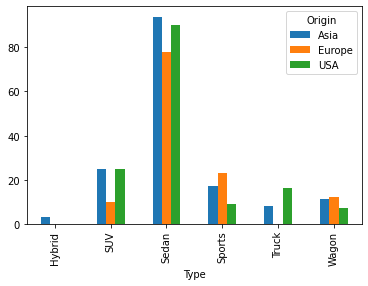

In [55]:
tabla.plot.bar()

### <font color='D12828'> Ejercicio: </font>

Obten la tabla de la cilindrada del coche (`Cylinders`) vs el tipo (`Type`) y representala gráficamente.

In [56]:
# Ejercicio


## Eliminar columnas

Una operación muy típica cuando se trabaja con un conjunto de datos es la de eliminar alguna columna si no aporta información útil, o  renombrarla para que el nombre sea más descriptivo. Veamos cómo hacemos esto en pandas:

Para eliminar columnas lo más cómodo es emplear el method `.drop()`, o indexar directamente las columnas que queramos:

In [57]:
cars2 = cars.drop(['MPG_City', 'MPG_Highway'], axis=1)
cars2

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,2822,101,180


In [58]:
cars3 = cars[['Make', 'Model', 'Type', 'Origin']]

### <font color='D12828'> Ejercicio: </font>

Hay situaciones en las que hay muchas columnas que empiezan o contienen el mismo nombre y queremos eliminarlas todas. En este ejemplo vemos 15 columnas llamadas 'test_num' pero en conjuntos de datos de alta dimensión este numero puede ser de cientos de columnas por lo que no podríamos ponernos a escribir a mano los nombres de todas ellas. En estas situaciones, puede ser muy útil utilizar los conceptos vistos en la primera sesión de list comprehension y de pertenencia a una lista para eliminar todas las columnas que contengan un cierto string.

* Usa una list comprehension para eliminar todas las columnas `test_num` de este dataframe:

In [59]:
df_test = pd.DataFrame(data=np.random.rand(2000).reshape((100, 20)), columns = ['A', 'B', 'test_0', 'test_1','test_2', 'test_3', 'test_4', 'test_5','test_6','test_7','test_8','test_9','test_10','test_11','test_12','test_13','test_14', 'C', 'D', 'E'])
df_test.head()

,A,B,test_0,test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9,test_10,test_11,test_12,test_13,test_14,C,D,E
0,0.144130,0.813224,0.389860,0.695220,0.216070,0.055341,0.618962,0.438887,0.277013,0.218830,0.333226,0.689296,0.509440,0.169677,0.108627,0.014461,0.781730,0.712637,0.658745,0.391529
1,0.830238,0.410867,0.534799,0.744660,0.244403,0.747576,0.055701,0.831397,0.068527,0.354315,0.494760,0.036994,0.747313,0.373595,0.806121,0.842633,0.015777,0.452606,0.898023,0.867076
2,0.874913,0.744422,0.521077,0.377727,0.682421,0.881860,0.572023,0.387508,0.668134,0.896090,0.013534,0.335760,0.536955,0.039619,0.428815,0.734063,0.927487,0.597065,0.884188,0.211619
3,0.346898,0.496022,0.771876,0.669724,0.369279,0.323075,0.273882,0.391978,0.239551,0.645894,0.989168,0.287479,0.696579,0.178451,0.429958,0.841456,0.358464,0.049277,0.751905,0.758959
4,0.103900,0.913221,0.155207,0.285335,0.305559,0.935922,0.515030,0.144154,0.623834,0.629861,0.067681,0.382809,0.833089,0.279854,0.247235,0.094903,0.243865,0.941027,0.152073,0.869946


In [60]:
# Ejercicio


## Renombrar columnas

Para renombrar columnas también tenemos dos posibilidades. 
1. Podemos usar el method `rename`, que recibe como input un diccionario con los nombres de las columnas (si quisiesemos renombrar las filas, podríamos pasarle como input un diccionario `index`).

In [61]:
df_test.rename(columns={'A':'COLUMNA 1'}).head()

,COLUMNA 1,B,test_0,test_1,test_2,test_3,test_4,test_5,test_6,test_7,test_8,test_9,test_10,test_11,test_12,test_13,test_14,C,D,E
0,0.144130,0.813224,0.389860,0.695220,0.216070,0.055341,0.618962,0.438887,0.277013,0.218830,0.333226,0.689296,0.509440,0.169677,0.108627,0.014461,0.781730,0.712637,0.658745,0.391529
1,0.830238,0.410867,0.534799,0.744660,0.244403,0.747576,0.055701,0.831397,0.068527,0.354315,0.494760,0.036994,0.747313,0.373595,0.806121,0.842633,0.015777,0.452606,0.898023,0.867076
2,0.874913,0.744422,0.521077,0.377727,0.682421,0.881860,0.572023,0.387508,0.668134,0.896090,0.013534,0.335760,0.536955,0.039619,0.428815,0.734063,0.927487,0.597065,0.884188,0.211619
3,0.346898,0.496022,0.771876,0.669724,0.369279,0.323075,0.273882,0.391978,0.239551,0.645894,0.989168,0.287479,0.696579,0.178451,0.429958,0.841456,0.358464,0.049277,0.751905,0.758959
4,0.103900,0.913221,0.155207,0.285335,0.305559,0.935922,0.515030,0.144154,0.623834,0.629861,0.067681,0.382809,0.833089,0.279854,0.247235,0.094903,0.243865,0.941027,0.152073,0.869946


2. También podemos acceder al atributo de las columnas y cambiar todos los nombres, por ejemplo:

In [62]:
df_na

,A,B,C
0,-2.0,NaN,2
1,1.0,4.0,4
2,NaN,NaN,5
3,5.0,1.0,9


In [63]:
df_na.columns = ['col1', 'col2', 'col3']
df_na

,col1,col2,col3
0,-2.0,NaN,2
1,1.0,4.0,4
2,NaN,NaN,5
3,5.0,1.0,9


### <font color='D12828'> Ejercicio: </font>

Los nombres de las variables en el conjunto de datos de `df_test` son un lío. Algunas están en mayusculas y otras en minúsculas. Cambialos para que todos estén en mayúsculas

In [64]:
# Ejercicio


## strings en `Pandas`

Todo lo que vimos que podíamos usar para strings en la primera parte del curso, pandas lo incluye en una versión mejorad, porque está preparada para tratar con datos ausentes. Para acceder a todos estos methods para strings, tenemos que acceder a la clase `str` y allí usar la función que queramos. Por ejemplo:

In [65]:
cars['Make'].str.upper()

0      ACURA
1      ACURA
2      ACURA
3      ACURA
4      ACURA
       ...  
423    VOLVO
424    VOLVO
425    VOLVO
426    VOLVO
427    VOLVO
Name: Make, Length: 428, dtype: object

[Aquí](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html) hay un muy buen ejemplo de cómo limpiar una base de datos de recetas usando estas funciones. 

Si observamos el conjunto de datos de cars, veremos que hay dos columnas con información sobre el precio de los coches (`MSRP` e `Invoice`). Sin embargo, como tienen un símbolo de dolar y usa ',' en vez de '.' para marcar el decimal, pandas no las detecta como números sino como strings.

In [66]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [67]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


Usando los métodos de tratamiento de strings de pandas, podemos eliminar el símbolo del dolar de todas las columnas.

In [68]:
cars['Invoice'] = cars['Invoice'].str.replace('$', '')

In [69]:
cars['Invoice']

0      33,337
1      21,761
2      24,647
3      30,299
4      39,014
        ...  
423    38,203
424    40,083
425    42,573
426    24,641
427    33,112
Name: Invoice, Length: 428, dtype: object

Sin embargo, la separación decimal en la variable se está marcando con una ',' y Python utiliza el '.'

### <font color='D12828'> Ejercicio: </font>

1. Utiliza los methods de strings vistos para cambiar la coma por el punto
2. Utiliza el method `.astype(float)` al final para convertir la variable `Invoice` en numérica
3. ¿Hay relación entre el precio del coche y su peso? Representalos gráficamente

In [70]:
# Ejercicio


# ¡Final!
¡Y con esto terminan nuestras sesiones de introducción a Python! Espero que hayais aprendido mucho y que hayais disfrutado. Recordad que tenéis la posibilidad de hacer el ejercicio extra del análisis exploratorio de datos de titanic, para el cual están disponibles las notebooks `eda_titanic_ejercicio` en la que se plantean las preguntas a resolver, y `eda_titanic_respuestas`, en el que se resuelven dichas preguntas. 

Y recordad, al final lo importante es que el código se ejecute.

![image.png](plots/final.png)